# Part 1:

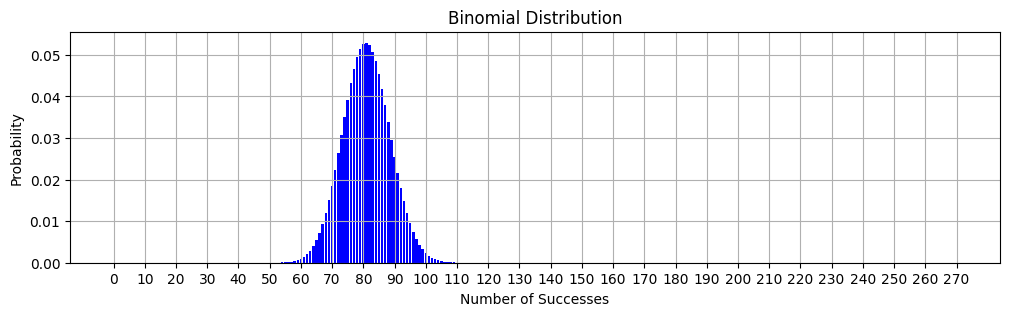

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

n = 270
p = 0.3

x = np.arange(0, n+1)
y = stats.binom.pmf(x, n, p)

plt.figure(figsize=(12, 3))
plt.bar(x, y, color='blue')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title('Binomial Distribution')
plt.xticks(np.arange(0, n+1, 10))
plt.grid()
plt.show()

# Part 2:

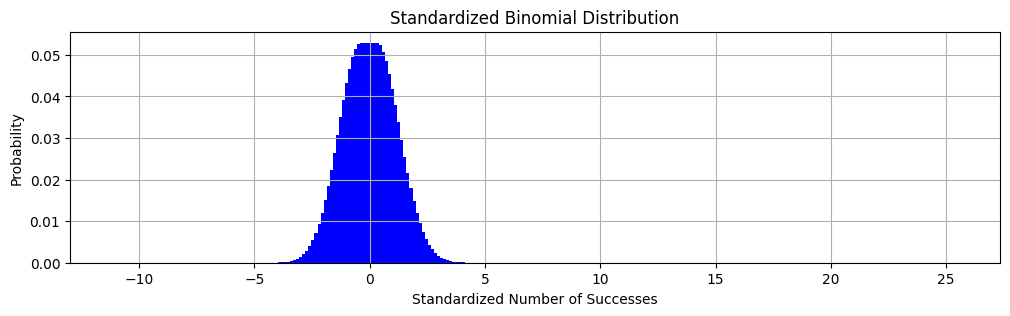

In [2]:
mean = n * p
std = np.sqrt(n*p*(1-p))
standardized_x = (x - mean) / std

plt.figure(figsize=(12, 3))
plt.bar(standardized_x, y, color='blue')
plt.xlabel('Standardized Number of Successes')
plt.ylabel('Probability')
plt.title('Standardized Binomial Distribution')
plt.grid()
plt.show()

# Part 3:

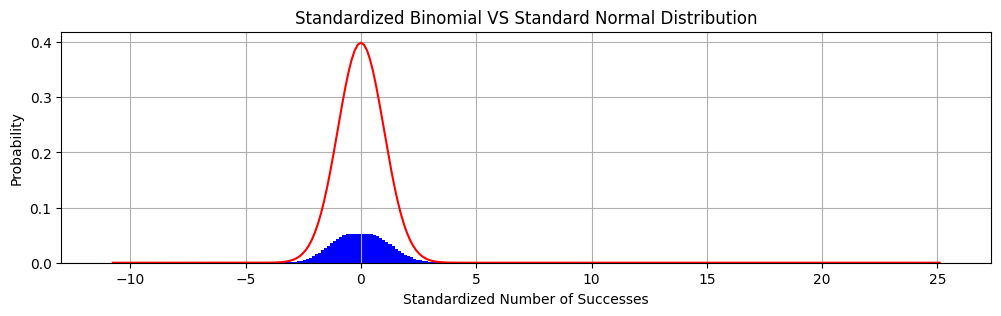

In [24]:
plt.figure(figsize=(12, 3))

x_normal = np.linspace(-15, 30, 100)
y_normal = stats.norm.pdf(standardized_x, 0, 1)
plt.plot(standardized_x, y_normal, 'r')
   
plt.bar(standardized_x, y, color='blue')
plt.xlabel('Standardized Number of Successes')
plt.ylabel('Probability')
plt.title('Standardized Binomial VS Standard Normal Distribution')
plt.grid()
plt.show()

from the above plot, it is observed a mismatch between the standardized binomial distribution and the actual standard normal distribution. This discrepancy is due to the discrete nature of the binomial distribution and the specific parameters chosen.

# Part 4:

In [4]:
sum_of_bars = 0
for len in y:
    sum_of_bars += len

print(f"The sum of bars of the Binomial Distribution: {sum_of_bars:.5f}")

The sum of bars of the Binomial Distribution: 1.00000


The sum of the heights of the bars in the binomial distribution histogram equals 1 because it represents the total probability of all possible outcomes in the binomial distribution which is a discrete distribution (PMF). While on the other hand, the area under the standard normal distribution should be 1 not the overall sum of the dots that shape the distribution because is a continues distribution (PDF). That is why the two distributions does not match.

# Part 5:

The multiplier calculated from the Riemann sum approximation: 0.13280317881493275
Standard Deviation of part 1: 5.00000
1/multiplier: 7.52994


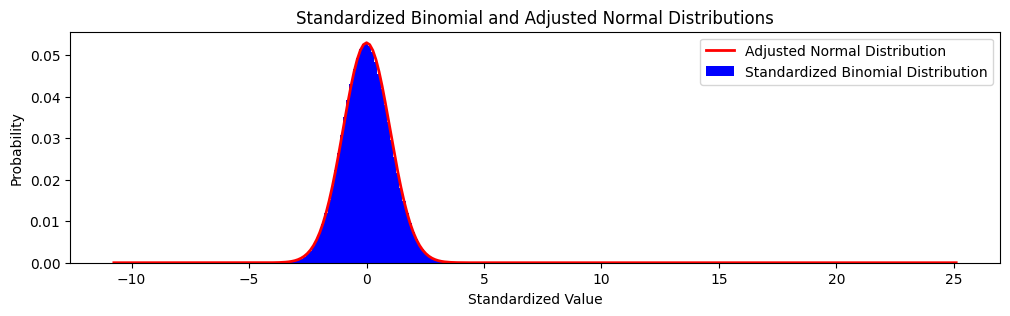

In [22]:
area_binom = sum_of_bars
area_normal = np.sum(y_normal)

multiplier = area_binom / area_normal
adjusted_normal_pdf = multiplier * y_normal

print("The multiplier calculated from the Riemann sum approximation:", multiplier)
print(f"Standard Deviation of part 1: {std:.5f}")
print(f"1/multiplier: {1/multiplier:.5f}")

plt.figure(figsize=(12, 3))
plt.bar(standardized_x, y, width = standardized_x[0] - standardized_x[1], color='blue', label='Standardized Binomial Distribution')
plt.plot(standardized_x, adjusted_normal_pdf, color='red', linewidth=2, alpha=1, label='Adjusted Normal Distribution')
plt.xlabel('Standardized Value')
plt.ylabel('Probability')
plt.title('Standardized Binomial and Adjusted Normal Distributions')
plt.legend()
plt.show()

It is observed that the inverse of the multiplier is equal to the standard deviation of the binomial distribution.  
This relationship can be expressed as:

$$\frac{1}{multiplier} = 𝜎$$

This observation confirms that standardization and proper adjustment can effectively match the normal distribution with the binomial distribution. By applying this multiplier, we ensure that the distributions are comparable and that the normal distribution provides a close approximation to the binomial distribution.

# Part 6:

* **Binomial Probability Mass Function**:
   $$ P(X = k) = \binom{n}{k} p^k (1-p)^{n-k} $$

* **The binomial distribution can be approximated by the normal distribution**:
   $$ \text{Binomial}(n, p, k) \approx \frac{1}{\sqrt{np(1 - p)}} \cdot \phi\left(\frac{k - np}{\sqrt{np(1 - p)}}\right) $$

In [12]:
k = 55
n = 100
p = 0.5
mean = n * p
std = np.sqrt(n * p * (1 - p))

binom_prob = stats.binom.pmf(k, n, p)
print(f"Binomial Distribution Probability for X = {k} is {binom_prob:.5f}")

z = (k - mean) / std
normal_pdf_value = stats.norm.pdf(z)
approx_prob = (1/std) * normal_pdf_value
print(f"Normal Distribution Approximation Probability for X = {k} is {approx_prob:.5f}")

Binomial Distribution Probability for X = 55 is 0.04847
Normal Distribution Approximation Probability for X = 55 is 0.04839


# Part 7:

In [16]:
a = 40
b = 60

approx_prob = 0
for num in range(a, b + 1):
    z = (num - mean) / std
    normal_pdf_value = stats.norm.pdf(z, 0, 1)
    approx_prob += (1/std) * normal_pdf_value

print(f"Probability of getting between {a} and {b} heads calculated by Riemann sum approximation: {approx_prob:.5f}")

probability_calculated_by_integral = stats.norm.cdf((b - mean) / std) - stats.norm.cdf((a - mean) / std)
print(f"Probability of getting between {a} and {b} heads calculated by integral: {probability_calculated_by_integral:.5f}")

Probability of getting between 40 and 60 heads calculated by Riemann sum approximation: 0.96458
Probability of getting between 40 and 60 heads calculated by integral: 0.95450
